Text(0, 0.5, 'Progression Progress')

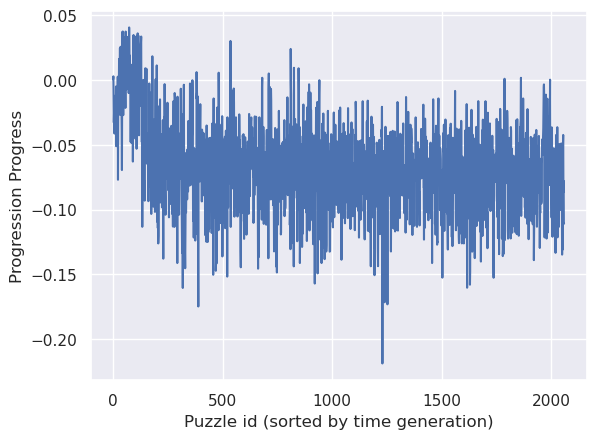

In [2]:
import sys
sys.path.append('/home/flowers/work/OpenELM')
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from openelm.environments.p3.p3 import P3ProbSolResult
import json
snapshot_path= "/home/flowers/work/OpenELM/logs/elm/24-02-05_15:39/step_130/puzzles.json"
with open(snapshot_path, "r") as f:
    genomes = json.load(f)


list_fitness=[]
list_idx_gen=[puz["idx_generation"] for puz in genomes]
for puz in genomes:
    if "fitnessPP" in puz:
        list_fitness.append(puz["fitnessPP"])
plt.plot(list_fitness)
plt.xlabel("Puzzle id (sorted by time generation)")
plt.ylabel("Progression Progress")

Text(0, 0.5, 'Progression Progress')

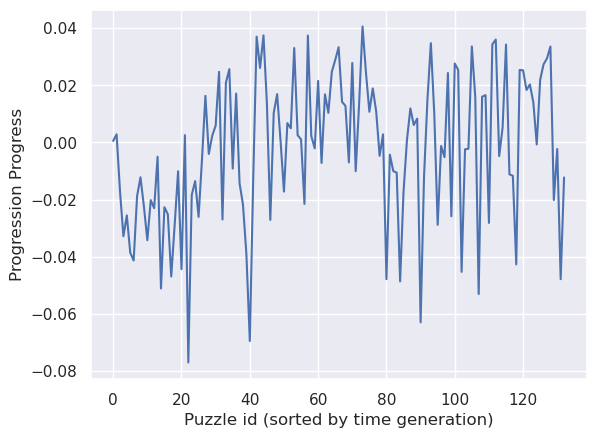

In [3]:
list_fitness=[]
list_idx_gen=[puz["idx_generation"] for puz in genomes]
for puz in genomes:
    if "fitnessPP" in puz and puz["idx_generation"]==-1:
        list_fitness.append(puz["fitnessPP"])
x= np.arange(len(list_fitness))-1
# plt.scatter(x,list_fitness)
plt.plot(list_fitness)
plt.xlabel("Puzzle id (sorted by time generation)")
plt.ylabel("Progression Progress")


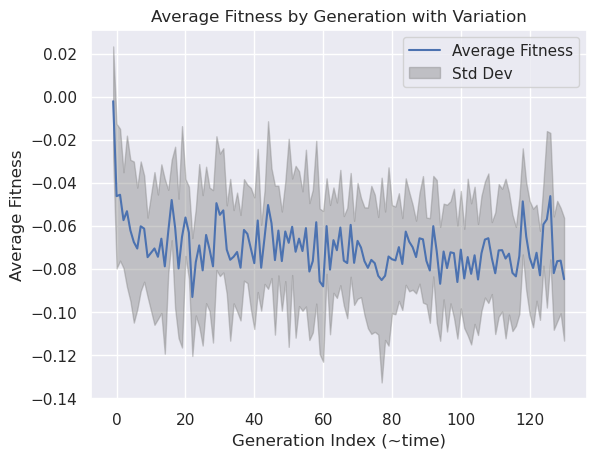

In [4]:


# Assuming list_fitness and list_idx_gen are populated as per your context
list_fitness = []  # This will be populated with fitness values
list_idx_gen = [puz["idx_generation"] for puz in genomes]  # Generation indices

# Placeholder for genomes.archive processing to fill list_fitness
for puz in genomes:
    if "fitnessPP" in puz:
        list_fitness.append(puz["fitnessPP"])

# Map each generation index to its fitness values
fitness_per_generation = defaultdict(list)
for idx, fitness in zip(list_idx_gen, list_fitness):
    fitness_per_generation[idx].append(fitness)

# Calculate the average fitness and standard deviation per generation
avg_fitness_per_gen = {}
std_dev_fitness_per_gen = {}
for gen, fitnesses in fitness_per_generation.items():
    avg_fitness_per_gen[gen] = np.mean(fitnesses)
    std_dev_fitness_per_gen[gen] = np.std(fitnesses)

# Sort the generations to plot them in order
sorted_gen_indices = sorted(avg_fitness_per_gen.keys())
sorted_avg_fitness = [avg_fitness_per_gen[gen] for gen in sorted_gen_indices]
sorted_std_dev_fitness = [std_dev_fitness_per_gen[gen] for gen in sorted_gen_indices]

# Calculate the upper and lower bounds for the fill
upper_bound = [avg + std for avg, std in zip(sorted_avg_fitness, sorted_std_dev_fitness)]
lower_bound = [avg - std for avg, std in zip(sorted_avg_fitness, sorted_std_dev_fitness)]

# Plotting
plt.plot(sorted_gen_indices, sorted_avg_fitness, label='Average Fitness')
plt.fill_between(sorted_gen_indices, lower_bound, upper_bound, color='gray', alpha=0.4, label='Std Dev')
plt.xlabel("Generation Index (~time)")
plt.ylabel("Average Fitness")
plt.title("Average Fitness by Generation with Variation")
plt.legend()
plt.show()


In [9]:
puz

{'fitness': 1.0,
 'program_str': 'from typing import List \n\nfrom typing import List\n\ndef f(max_product: int, nums=[2, 3, -2, 4]) -> bool:\n    return max_product == 6\n\ndef g(nums=[2, 3, -2, 4]) -> int:\n    def max_product_subarray(nums):\n        if not nums:\n            return 0\n\n        max_so_far = nums[0]\n        min_so_far = nums[0]\n        result = max_so_far\n\n        for num in nums[1:]:\n            temp_max = max(num, max_so_far * num, min_so_far * num)\n            min_so_far = min(num, max_so_far * num, min_so_far * num)\n\n            max_so_far = temp_max\n\n            result = max(result, max_so_far)\n\n        return result\n\n    return max_product_subarray(nums)\n\nassert f(g()) == True\n',
 'emb': [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'explanation_emb': 'The puzzle involves mathematical operations and dynamic programming.',
 'idx_generation': 130,
 'target_skills': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 '

In [15]:
def pass_at_k(n, c, k):
    """
    Adapted from "Evaluating Large Language Models Trained on Code" (https://arxiv.org/abs/2107.03374)
    :param n: total number of samples
    :param c: number of correct samples
    :param k: k in pass@k
    """
    assert n >= k
    if n - c < k:
        return 1.0
    return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))

In [16]:
puz["n_correct"]

4

Text(0, 0.5, 'Progression Progress')

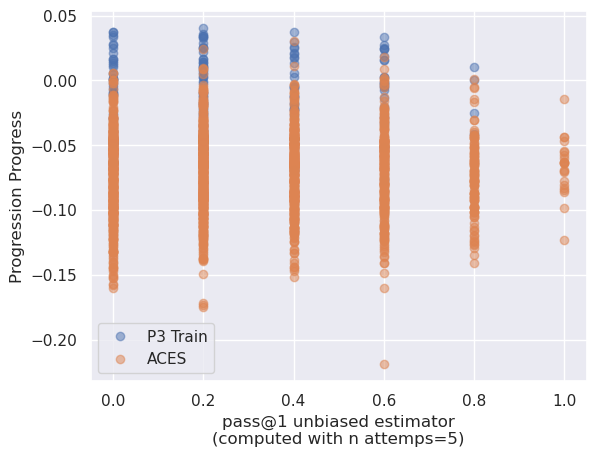

In [38]:
list_fitness=[]
list_passk=[]
list_correct=[]
list_fitness_train=[]
list_passk_train=[]
list_correct_train=[]
n=5
c=1
k=1
for puz in genomes:
    if puz["idx_generation"]!=-1:
        if "fitnessPP" in puz and "n_correct" in puz:
            list_fitness.append(puz["fitnessPP"])
            list_passk.append(pass_at_k(n, puz["n_correct"], k))#puz["n_correct"]/5)   
            list_correct.append(puz["n_correct"])
    else:
        if "fitnessPP" in puz and "n_correct" in puz:
            list_fitness_train.append(puz["fitnessPP"])
            list_passk_train.append(pass_at_k(n, puz["n_correct"], k))
            list_correct_train.append(puz["n_correct"])
plt.plot(list_passk_train,list_fitness_train , 'o',alpha=0.5)
plt.plot(list_passk,list_fitness , 'o',alpha=0.5)
plt.legend(["P3 Train", "ACES"])
plt.xlabel("pass@1 unbiased estimator\n(computed with n attemps=5)")
plt.ylabel("Progression Progress")

In [82]:
for puz in genomes:
    if puz["n_correct"]==5 and puz["idx_generation"]!=-1:
        print("\n")
        print(puz["program_str"])
        



from typing import List 

def f(is_palindrome: bool, text='radar') -> bool:
    return text == text[::-1]

def g(text='radar') -> str:
    return text[::-1]

assert f(g()) == True



from typing import List 

def f(is_anagram: bool, s1='listen', s2='silent') -> bool:
    from collections import Counter
    return Counter(s1) == Counter(s2)

def g(s1='listen', s2='silent') -> bool:
    return sorted(s1) == sorted(s2)

assert f(g()) == True



from typing import List 

def f(is_palindrome: bool, text='radar') -> bool:
    return text == text[::-1]

def g(text='radar') -> str:
    return text

assert f(g()) == True



from typing import List 

def f(is_palindrome: bool, word="radar") -> bool:
    word = word.lower().replace(" ", "")
    return word == word[::-1]

def g(word="radar") -> str:
    return word

assert f(g()) == True




from typing import List 

def f(is_palindrome: bool, text="radar") -> bool:
    return text == text[::-1]

def g(text="radar") -> str:
    return text

asse

Text(0.5, 0, 'Number of correct solution out of 5 attempts\n (0 puzzles unsolved,...)')

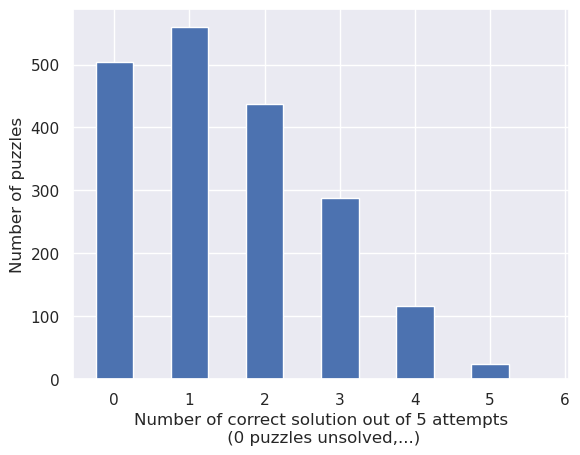

In [70]:
bins = np.linspace(0,6, 7)-0.25
plt.hist(list_correct,bins=bins,align="mid",width=0.5)
plt.ylabel("Number of puzzles")
plt.xlabel("Number of correct solution out of 5 attempts\n (0 puzzles unsolved,...)")

In [54]:
set(list_correct)

{0, 1, 2, 3, 4, 5}

In [77]:
# np.mean(list_passk_train), np.mean(list_passk)
list_k=[i for i in range(1,6)]

print("pass_k train")
pass_k_train={}
for k in list_k:
    pass_k_train[f"pass_{k}"]=[]
for corr in list_correct_train:
    for k in list_k:
        pass_k_train[f"pass_{k}"].append(pass_at_k(n, corr, k))
for k in list_k:
    print(f"pass@{k} = {np.mean(pass_k_train[f'pass_{k}'])}")

print("========\npass_k ACES")
pass_k={}
for k in list_k:
    pass_k[f"pass_{k}"]=[]
for corr in list_correct:
    for k in list_k:
        pass_k[f"pass_{k}"].append(pass_at_k(n, corr, k))
for k in list_k:
    print(f"pass@{k} = {np.mean(pass_k[f'pass_{k}'])}")

pass_k train
pass@1 = 0.2721804511278195
pass@2 = 0.456390977443609
pass@3 = 0.5812030075187969
pass@4 = 0.6691729323308271
pass@5 = 0.7368421052631579
pass_k ACES
pass@1 = 0.29844398340248957
pass@2 = 0.4813796680497926
pass@3 = 0.5997406639004149
pass@4 = 0.6804979253112033
pass@5 = 0.7385892116182573
